# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import openpyxl
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
#creating two different columns for date and time from the column InvoiceDate
df['Date']= pd.to_datetime(df['InvoiceDate']).dt.to_period('M').copy() # creating date column with the month and year only for Data Visualization
df['Time']= pd.to_datetime(df['InvoiceDate']).dt.time

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,08:26:00


In [8]:
#dropping the InvoiceDate column
df.drop('InvoiceDate', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12,08:26:00


In [9]:
df.shape

(541909, 9)

In [10]:
#finding out the number of duplicate rows
duplicate_rows= df[df.duplicated()]
print("Number of Duplicate Rows are: ", duplicate_rows.shape)

Number of Duplicate Rows are:  (5268, 9)


In [11]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
UnitPrice      541909
CustomerID     406829
Country        541909
Date           541909
Time           541909
dtype: int64

In [12]:
#dropping duplicate rows
df=df.drop_duplicates()
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
UnitPrice      536641
CustomerID     401604
Country        536641
Date           536641
Time           536641
dtype: int64

In [13]:
df.shape

(536641, 9)

In [14]:
#finding missing or null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135037
Country             0
Date                0
Time                0
dtype: int64

In [15]:
#dropping missing or null values
df=df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Time           0
dtype: int64

In [16]:
columns_to_drop = ["InvoiceNo", "StockCode"]
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
df.head()

,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12,08:26:00
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12,08:26:00
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12,08:26:00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12,08:26:00
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12,08:26:00


In [18]:
# Calculate the gross amount for each transaction (Quantity * UnitPrice)
df = df.assign(Gross=df['Quantity'] * df['UnitPrice'])
df

,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Gross
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12,08:26:00,15.30
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12,08:26:00,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12,08:26:00,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12,08:26:00,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12,08:26:00,20.34
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12,12:50:00,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12,12:50:00,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12,12:50:00,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12,12:50:00,16.60


In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID,Gross
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [20]:
# Calculate measures of central tendency
median = df.median(numeric_only=True)
median

Quantity          5.00
UnitPrice         1.95
CustomerID    15145.00
Gross            11.70
dtype: float64

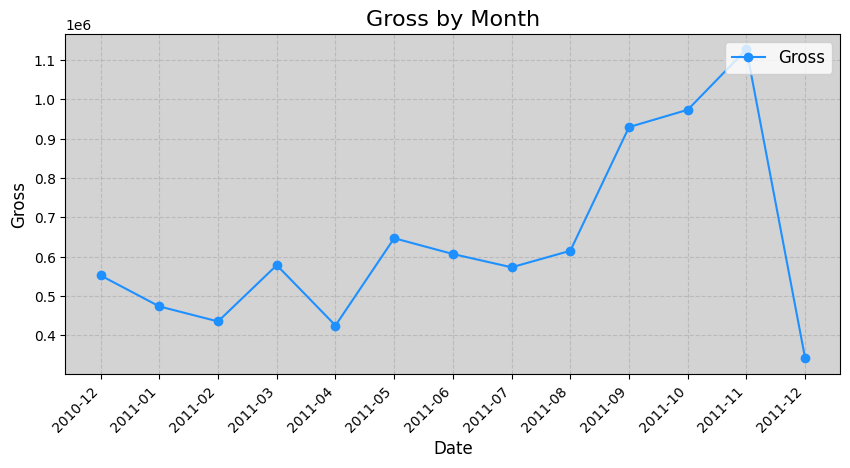

In [21]:
# Group the data by 'Date' and calculate the gross purchase for each month
monthly_data = df.groupby('Date')['Gross'].sum().reset_index()

# Convert the 'Date' column to string format
monthly_data['Date'] = monthly_data['Date'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Automatic formatting to the x-axis labels when dealing with dates
fig.autofmt_xdate()

# Create a colorful plot with markers and lines
plt.plot(monthly_data['Date'], monthly_data['Gross'], marker='o', linestyle='-', color='dodgerblue', label='Gross')

# Customize the plot
plt.title('Gross by Month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gross', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')


plt.show() 

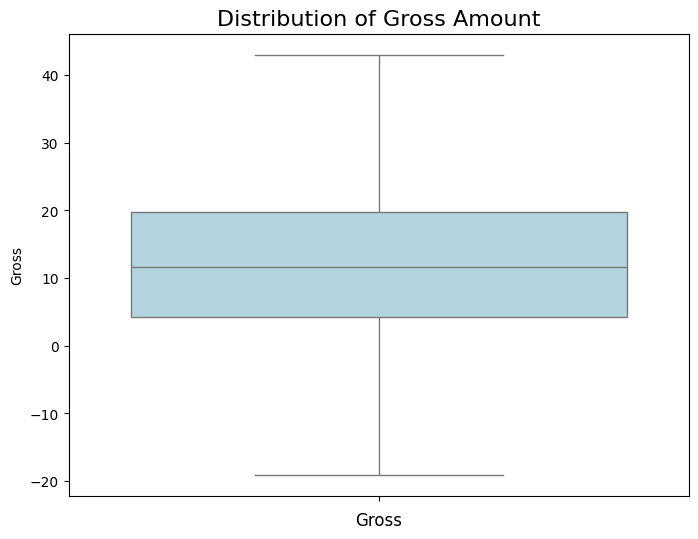

In [22]:
# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Gross' column
sns.boxplot(data=df, y='Gross', color='lightblue', showfliers=False)  # showfliers=False to remove outliers

# Add a title and labels
plt.title('Distribution of Gross Amount', fontsize=16)
plt.xlabel('Gross', fontsize=12)

# Show the plot
plt.show()

In [23]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(df['Gross'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = df[outlier_mask]

outliers.shape

(252, 8)

In [24]:
# Remove outliers from the main dataset
without_outliers_online_retail = df[~outlier_mask]

# Statistical Summary of data without outliers
summary_without_outliers = without_outliers_online_retail.describe()
summary_without_outliers

,Quantity,UnitPrice,CustomerID,Gross
count,401352.000000,401352.000000,401352.000000,401352.000000
mean,11.861491,3.137866,15280.488083,19.672581
std,44.595356,11.326753,1713.717787,48.074004
min,-9360.000000,0.000000,12347.000000,-1252.950000
25%,2.000000,1.250000,13936.750000,4.250000
50%,5.000000,1.950000,15144.000000,11.700000
75%,12.000000,3.750000,16782.000000,19.740000
max,12540.000000,1270.060000,18287.000000,1306.800000


In [25]:
df.describe() # Statistical Summary of data with outliers

,Quantity,UnitPrice,CustomerID,Gross
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


C:\Users\jaysh\AppData\Local\Temp\ipykernel_8880\4221193994.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=without_outliers_online_retail, y='Gross', palette=colors, width=0.5, linewidth=2)
C:\Users\jaysh\AppData\Local\Temp\ipykernel_8880\4221193994.py:8: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(data=without_outliers_online_retail, y='Gross', palette=colors, width=0.5, linewidth=2)


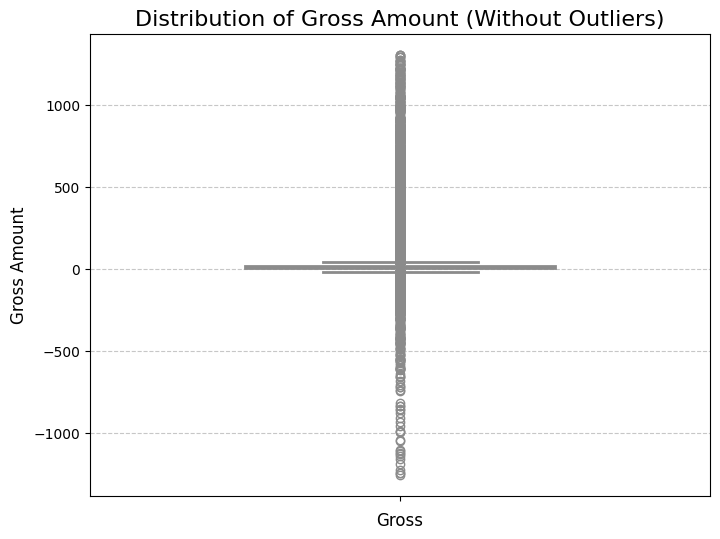

In [26]:
# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Customize the color palette
colors = sns.color_palette("Blues")  # You can choose a different palette

# Create a box plot for the 'Gross' column without outliers
sns.boxplot(data=without_outliers_online_retail, y='Gross', palette=colors, width=0.5, linewidth=2)

# Add a title and labels
plt.title('Distribution of Gross Amount (Without Outliers)', fontsize=16)
plt.xlabel('Gross', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)

# Add a grid to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()